In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Cargar dataset ===
df = pd.read_csv("../data/datasets/publications_training_dataset.csv", index_col='gb_id')

print(f"Shape: {df.shape}")
print("\nColumnas:")
print(df.columns.tolist())
df.head()

Shape: (2409, 19)

Columnas:
['title', 'abstract', 'year', 'keywords', 'publication_type', 'language', 'source', 'editorial', 'conference_name', 'jcr_materias', 'citations', 'international_collab', 'num_countries', 'num_foreign_affils', 'num_spanish_affils', 'quartile_value', 'impact_factor', 'percentile', 'label']


title  \
gb_id                                                       
346122  Protein tyrosine phosphatase gene (PTPN22) pol...   
278156  Association of the macrophage migration inhibi...   
39805    Prp40 and early events in splice site definition   
326575  Lack of association between ankylosing spondyl...   
39602   Identification of IL12RB1 as a Novel Systemic ...   

                                                 abstract  year  \
gb_id                                                             
346122                                                NaN  2005   
278156                                                NaN  2007   
39805   The alternative splicing (AS) of precursor mes...  2016   
326575                                                NaN  2006   
39602   ["ObjectiveLumbar spinal stenosis is one of th...  2014   

                                                 keywords    publication_type  \
gb_id                                                                           
346122  RHEUMATOID-ARTHRITIS;SYSTEMIC-LUPUS-ERYTHEMATO...              letter   
278156                             SODIUM-INDUCED COLITIS              letter   
39805   Protein Structure, Tertiary;Alternative Splici...              review   
326575     TYROSINE-PHOSPHATASE PTPN22;R620W POLYMORPHISM  editorial material   
39602   Genetic Predisposition to Disease;Gene Frequen...  editorial material   

       language                               source             editorial  \
gb_id                                                                        
346122      eng                 Journal of Neurology       Springer Nature   
278156      eng                                  Gut  BMJ Publishing Group   
39805       eng  Wiley Interdisciplinary Reviews-Rna                 Wiley   
326575      eng     Annals of The Rheumatic Diseases  BMJ Publishing Group   
39602       eng             Arthritis & Rheumatology                 Wiley   

       conference_name                   jcr_materias  citations  \
gb_id                                                              
346122             NaN             Clinical Neurology         42   
278156             NaN  Gastroenterology & Hepatology         38   
39805              NaN                   Cell Biology         21   
326575             NaN                   Rheumatology         25   
39602              NaN                   Rheumatology         37   

        international_collab  num_countries  num_foreign_affils  \
gb_id                                                             
346122                   1.0              1                   0   
278156                   1.0              1                   0   
39805                    1.0              1                   0   
326575                   1.0              1                   0   
39602                    7.0              7                  17   

        num_spanish_affils  quartile_value  impact_factor  percentile  \
gb_id                                                                   
346122                   4             NaN          2.844      80.743   
278156                   8             NaN         10.015      95.000   
39805                    3             NaN          4.838      72.368   
326575                   5             NaN          5.767      93.478   
39602                    7             NaN            NaN         NaN   

                                label  
gb_id                                  
346122             Clinical Neurology  
278156  Gastroenterology & Hepatology  
39805                    Cell Biology  
326575                   Rheumatology  
39602                    Rheumatology

## üìä 2. Distribuci√≥n de la variable objetivo (label)

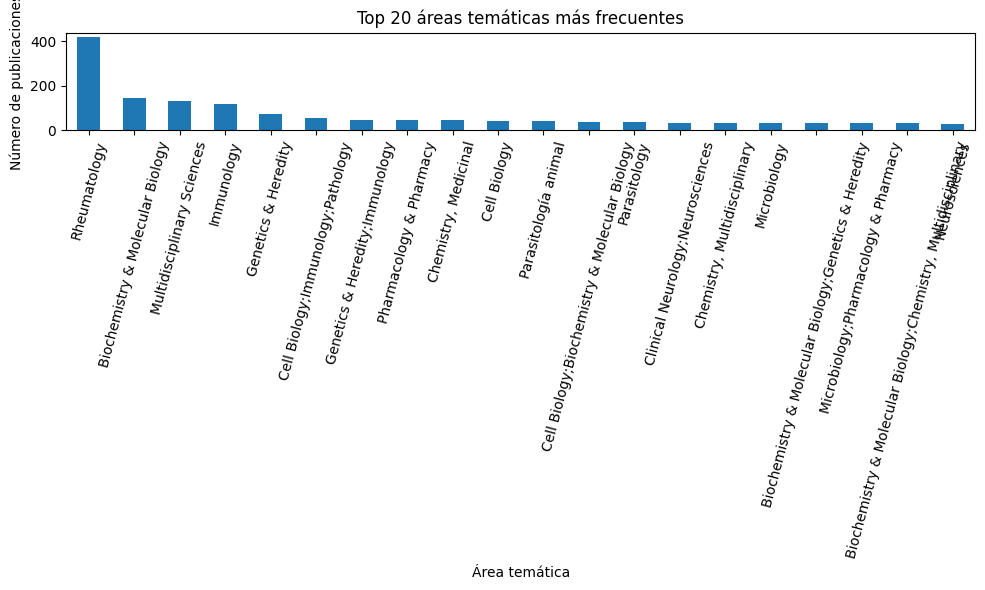


label
Rheumatology                                                     418
Biochemistry & Molecular Biology                                 144
Multidisciplinary Sciences                                       131
Immunology                                                       117
Genetics & Heredity                                               73
Cell Biology;Immunology;Pathology                                 54
Genetics & Heredity;Immunology                                    48
Pharmacology & Pharmacy                                           47
Chemistry, Medicinal                                              47
Cell Biology                                                      44
Parasitolog√≠a animal                                              43
Cell Biology;Biochemistry & Molecular Biology                     38
Parasitology                                                      38
Clinical Neurology;Neurosciences                                  35
Chemistry, Multidisciplina

In [65]:
plt.figure(figsize=(10, 6))
df['label'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 √°reas tem√°ticas m√°s frecuentes")
plt.xlabel("√Årea tem√°tica")
plt.ylabel("N√∫mero de publicaciones")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

print()
print(df['label'].value_counts().head(20))

## üîÑ Etiquetas m√∫ltiples por publicaci√≥n (si aplica)

In [66]:
df['num_labels'] = df['label'].apply(lambda x: len(str(x).split(';')))
print(df['num_labels'].value_counts())

df['is_multilabel'] = df['label'].apply(lambda x: ';' in str(x))
print("Publicaciones con m√∫ltiples √°reas tem√°ticas:", df['is_multilabel'].sum())

num_labels
1    1511
2     621
3     244
4      31
5       2
Name: count, dtype: int64
Publicaciones con m√∫ltiples √°reas tem√°ticas: 898


## üßº 3. Valores nulos

quartile_value     1.000000
conference_name    0.890826
abstract           0.219178
keywords           0.171025
percentile         0.095890
impact_factor      0.092985
jcr_materias       0.089249
editorial          0.003321
dtype: float64


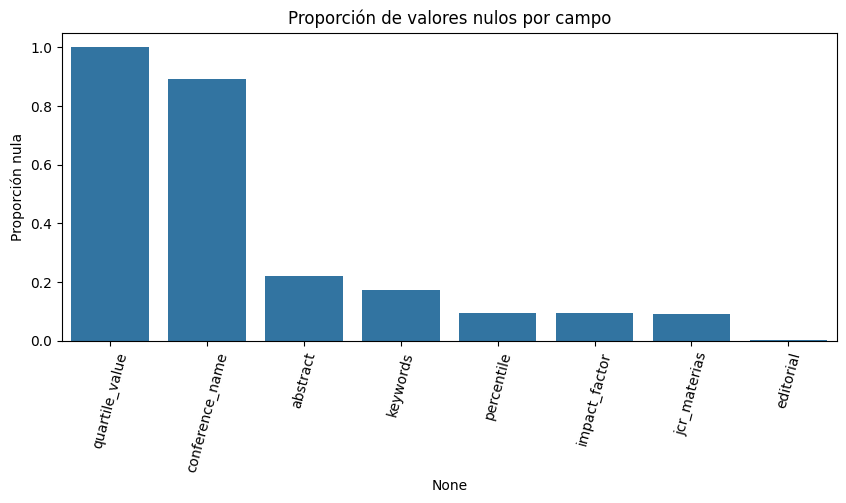

In [67]:
nulls = df.isnull().mean().sort_values(ascending=False)
print(nulls[nulls > 0])

plt.figure(figsize=(10, 4))
sns.barplot(x=nulls[nulls > 0].index, y=nulls[nulls > 0].values)
plt.title("Proporci√≥n de valores nulos por campo")
plt.xticks(rotation=75)
plt.ylabel("Proporci√≥n nula")
plt.show()

## üß† 4. An√°lisis de texto: longitud del t√≠tulo, resumen y keywords

In [68]:
df['title_len'] = df['title'].fillna('').apply(len)
df['abstract_len'] = df['abstract'].fillna('').apply(len)
df['keywords_len'] = df['keywords'].fillna('').apply(lambda x: len(str(x).split(';')))

df[['title_len', 'abstract_len', 'keywords_len']].describe()

title_len  abstract_len  keywords_len
count  2409.000000   2409.000000   2409.000000
mean    106.254462   1077.316729     10.737235
std      35.006958    710.137884      7.374494
min      16.000000      0.000000      1.000000
25%      82.000000    551.000000      5.000000
50%     103.000000   1222.000000     10.000000
75%     129.000000   1604.000000     15.000000
max     322.000000   4420.000000     43.000000

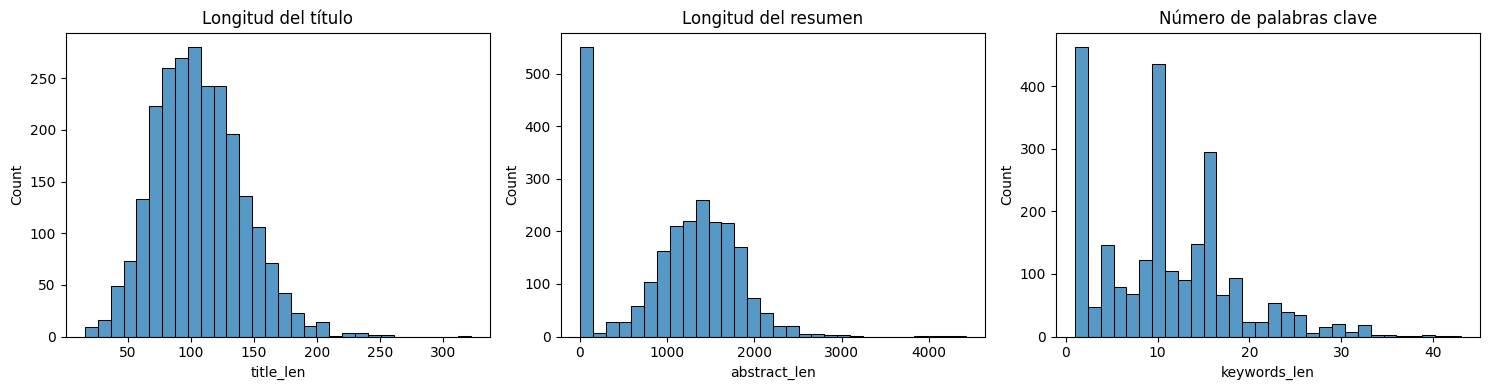

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['title_len'], bins=30, ax=axes[0])
axes[0].set_title("Longitud del t√≠tulo")
sns.histplot(df['abstract_len'], bins=30, ax=axes[1])
axes[1].set_title("Longitud del resumen")
sns.histplot(df['keywords_len'], bins=30, ax=axes[2])
axes[2].set_title("N√∫mero de palabras clave")
plt.tight_layout()
plt.show()


## üåê 5. Idioma de publicaci√≥n

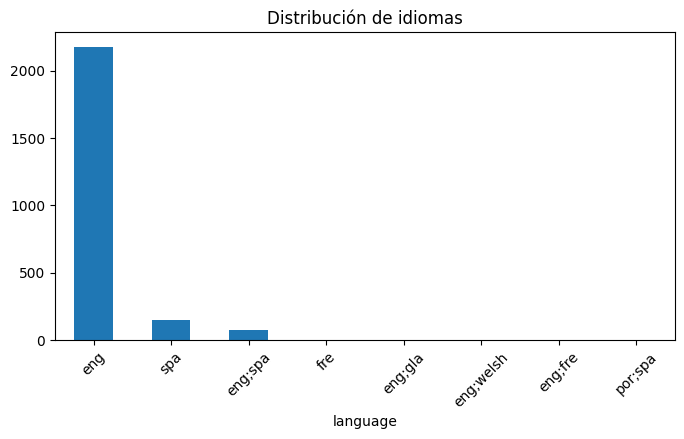


language
eng          2178
spa           146
eng;spa        77
fre             4
eng;gla         1
eng;welsh       1
eng;fre         1
por;spa         1
Name: count, dtype: int64


In [70]:
plt.figure(figsize=(8, 4))
df['language'].value_counts().plot(kind='bar')
plt.title("Distribuci√≥n de idiomas")
plt.xticks(rotation=45)
plt.show()

print()
print(df['language'].value_counts())

## üóìÔ∏è 6. Distribuci√≥n temporal

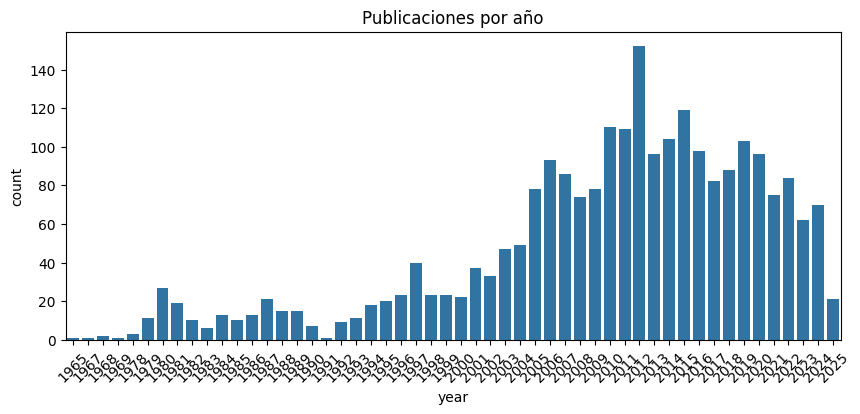

In [71]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="year", order=sorted(df['year'].dropna().unique()))
plt.title("Publicaciones por a√±o")
plt.xticks(rotation=45)
plt.show()

üìà 7. M√©tricas bibliom√©tricas

         citations  impact_factor   percentile
count  2409.000000    2185.000000  2178.000000
mean     38.425073       5.702968    78.437832
std     162.170743       5.448082    17.999206
min       0.000000       0.000000     0.714000
25%       2.000000       2.935000    69.712750
50%      15.000000       4.300000    83.499500
75%      38.000000       6.696000    91.667000
max    5716.000000      91.253000    99.733000


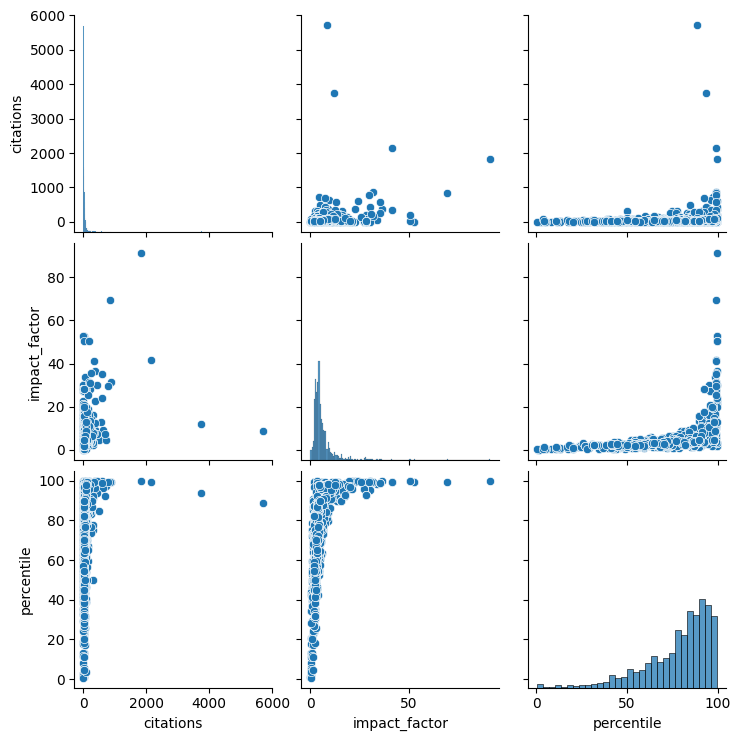

In [72]:
numeric_cols = ['citations', 'impact_factor', 'percentile']
print(df[numeric_cols].describe())

sns.pairplot(df[numeric_cols].dropna())

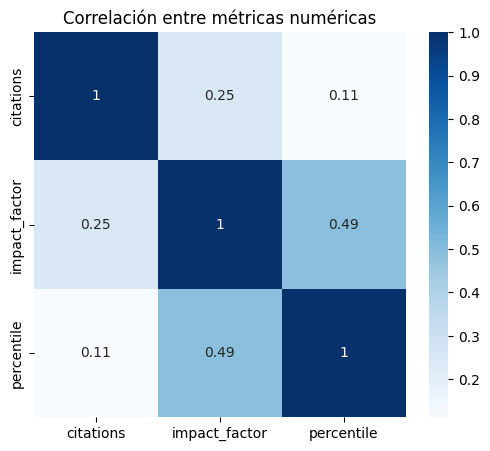

In [73]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlaci√≥n entre m√©tricas num√©ricas")
plt.show()


## üß¨ 8. Fuente y tipo de publicaci√≥n

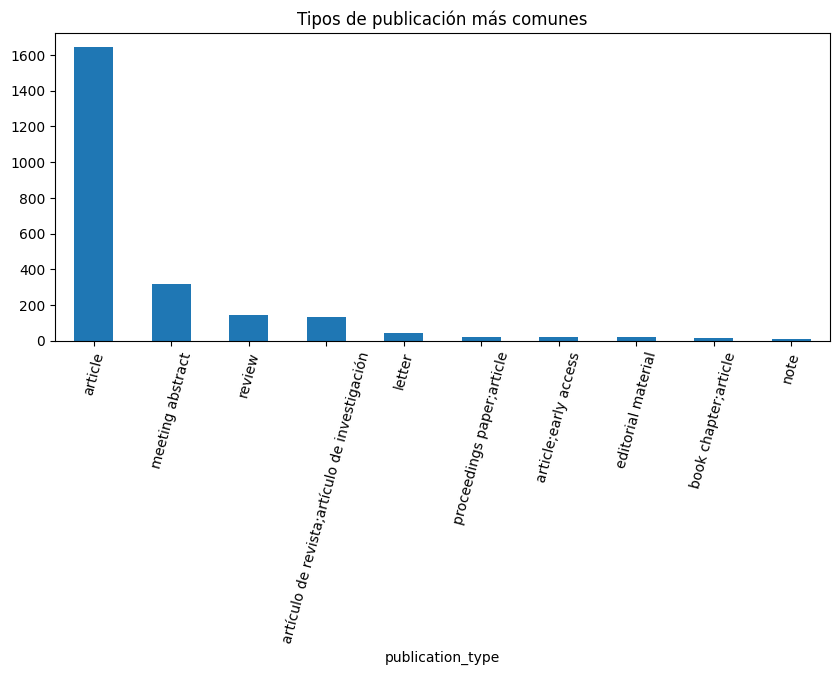


publication_type
article                                                1643
meeting abstract                                        317
review                                                  144
art√≠culo de revista;art√≠culo de investigaci√≥n           133
letter                                                   43
proceedings paper;article                                23
article;early access                                     20
editorial material                                       19
book chapter;article                                     15
note                                                      9
art√≠culos;art√≠culo                                        7
art√≠culo de revista;nota                                  6
proceedings paper                                         6
conference paper                                          5
article;book chapter                                      3
review;book chapter                                       3
art√≠culo de rev

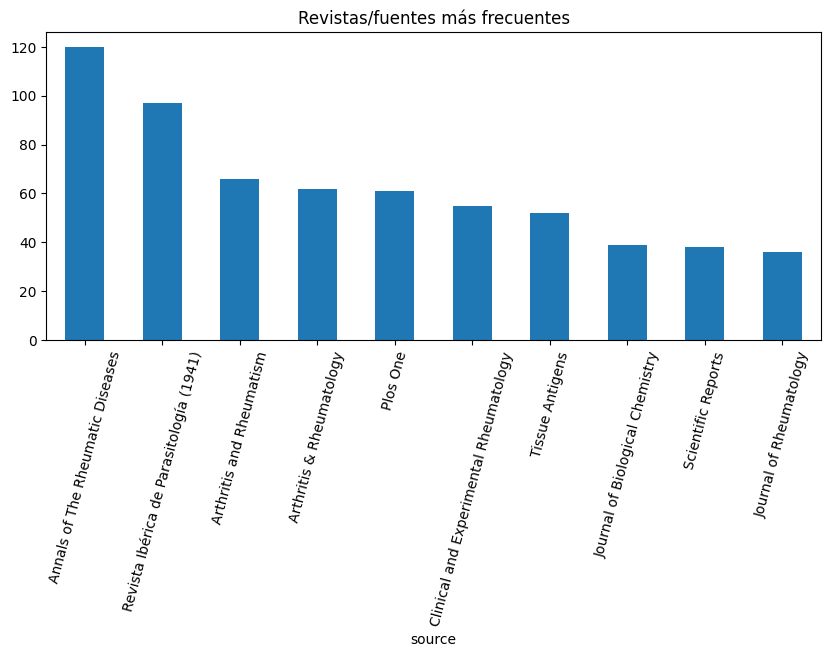


source
Annals of The Rheumatic Diseases           120
Revista Ib√©rica de Parasitolog√≠a (1941)     97
Arthritis and Rheumatism                    66
Arthritis & Rheumatology                    62
Plos One                                    61
Clinical and Experimental Rheumatology      55
Tissue Antigens                             52
Journal of Biological Chemistry             39
Scientific Reports                          38
Journal of Rheumatology                     36
Name: count, dtype: int64

editorial
Elsevier                                             457
Wiley                                                363
Oxford University Press                              137
BMJ Publishing Group                                 134
Sociedad Espa√±ola de Parasitolog√≠a (sep)              97
Public Library of Science                             93
MDPI                                                  80
Nature Research                                       79
Springer Nature [academic

In [74]:
plt.figure(figsize=(10, 4))
df['publication_type'].value_counts().head(10).plot(kind='bar')
plt.title("Tipos de publicaci√≥n m√°s comunes")
plt.xticks(rotation=75)
plt.show()

print()
print(df['publication_type'].value_counts())

plt.figure(figsize=(10, 4))
df['source'].value_counts().head(10).plot(kind='bar')
plt.title("Revistas/fuentes m√°s frecuentes")
plt.xticks(rotation=75)
plt.show()

print()
print(df['source'].value_counts().head(10))

print()
print(df['editorial'].value_counts().head(20))

In [ ]:
editorial_cumsum = df['editorial'].value_counts(normalize=True).cumsum()
editorial_cumsum = editorial_cumsum.reset_index()
editorial_cumsum.columns = ['editorial', 'cumulative_proportion']
editorial_cumsum[editorial_cumsum['cumulative_proportion'] <= 0.8]


## Correlaci√≥n con la variable label

In [75]:
from scipy.stats import chi2_contingency, f_oneway

df['label'] = df['label'].astype(str).str.strip()

In [76]:
# === 3. CHI-CUADRADO: label vs variables categ√≥ricas ===

def chi_square_test(cat_column):
    print(f"\nüîπ Chi-cuadrado entre 'label' y '{cat_column}':")
    contingency = pd.crosstab(df['label'], df[cat_column])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"  œá¬≤ = {chi2:.2f}, p = {p:.4f}, dof = {dof}")
    if p < 0.05:
        print("  ‚Üí Hay dependencia estad√≠sticamente significativa.")
    else:
        print("  ‚Üí No hay evidencia de dependencia significativa.")

chi_square_test("language")
chi_square_test("publication_type")
chi_square_test("source")
chi_square_test("editorial")


üîπ Chi-cuadrado entre 'label' y 'language':
  œá¬≤ = 4845.54, p = 0.0000, dof = 1995
  ‚Üí Hay dependencia estad√≠sticamente significativa.

üîπ Chi-cuadrado entre 'label' y 'publication_type':
  œá¬≤ = 21607.16, p = 0.0000, dof = 7695
  ‚Üí Hay dependencia estad√≠sticamente significativa.

üîπ Chi-cuadrado entre 'label' y 'source':
  œá¬≤ = 585815.70, p = 0.0000, dof = 171855
  ‚Üí Hay dependencia estad√≠sticamente significativa.

üîπ Chi-cuadrado entre 'label' y 'editorial':
  œá¬≤ = 114384.00, p = 0.0000, dof = 31360
  ‚Üí Hay dependencia estad√≠sticamente significativa.


## Vamos a ver el dataset de test

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Cargar dataset ===
df = pd.read_csv("../data/datasets/publications_to_predict_dataset.csv", index_col='gb_id')

print(f"Shape: {df.shape}")
print("\nColumnas:")
print(df.columns.tolist())
df.head()

Shape: (1114, 19)

Columnas:
['title', 'abstract', 'year', 'keywords', 'publication_type', 'language', 'source', 'editorial', 'conference_name', 'jcr_materias', 'citations', 'international_collab', 'num_countries', 'num_foreign_affils', 'num_spanish_affils', 'quartile_value', 'impact_factor', 'percentile', 'label']


title  \
gb_id                                                       
157196  Generation of lymphocyte antigen receptor dive...   
326573  The potential effect of cortistatin on endotox...   
912201  Pr77 and L1TcRz: A dual system within the 5‚Ä≤-e...   
515752  Molecular mechanisms underlying LRRK2-mediated...   
570968  UNA VISI√ìN GLOBAL DE LA PANDEMIA COVID-19: Qu√©...   

                                                 abstract  year  \
gb_id                                                             
157196  V(D)J recombination is the assembly of gene se...  2013   
326573                                                NaN  2006   
912201  The sequence corresponding to the first 77 nuc...  2012   
515752                                                NaN  2022   
570968                                                NaN  2020   

                                                 keywords  \
gb_id                                                       
157196                                                NaN   
326573                                                NaN   
912201  Retrotransposon;Mammalian CPEB3 ribozyme;Retro...   
515752                                                NaN   
570968                                                NaN   

                               publication_type language  \
gb_id                                                      
157196                             short survey  eng;spa   
326573                                     note      eng   
912201                carta al editor;art√≠culos  eng;spa   
515752  libros completos;tesis doctoral/tfm/tfg      eng   
570968    libros completos;libro de divulgaci√≥n      spa   

                                                   source  \
gb_id                                                       
157196                                        Inmunologia   
326573                    Modern Aspects of Immunobiology   
912201                            Mobile Genetic Elements   
515752  Molecular Mechanisms Underlying Lrrk2-Mediated...   
570968  Una Visi√≥n Global de la Pandemia Covid-19: Qu√©...   

                                              editorial  conference_name  \
gb_id                                                                      
157196                               Ediciones Ergon Sa              NaN   
326573                                        Ia Verlag              NaN   
912201                               Taylor and Francis              NaN   
515752         Universidad de Granada. Tesis Doctorales              NaN   
570968  Consejo Superior de Investigaciones Cient√≠ficas              NaN   

        jcr_materias  citations  international_collab  num_countries  \
gb_id                                                                  
157196           NaN          0                   1.0              1   
326573           NaN          0                   1.0              1   
912201           NaN         11                   1.0              1   
515752           NaN          0                   2.0              2   
570968           NaN          0                   1.0              1   

        num_foreign_affils  num_spanish_affils  quartile_value  impact_factor  \
gb_id                                                                           
157196                   0                   1             NaN            NaN   
326573                   0                   1             NaN            NaN   
912201                   0                   3             NaN            NaN   
515752                   1                   1             NaN            NaN   
570968                   0                  34             NaN            NaN   

        percentile  label  
gb_id                      
157196         NaN    NaN  
326573         NaN    NaN  
912201         NaN    NaN  
515752         NaN    NaN  
570968         NaN    NaN

In [78]:
print()
print(df['editorial'].value_counts().head(20))


editorial
Elsevier                          22
BMJ Publishing Group              11
Springer                          11
Wiley                              8
BioMed Central                     8
Ediciones Ergon Sa                 5
Hindawi                            5
Instituto Nacional de Salud        5
Public Library of Science          5
Nova Science Publishers            4
Lippincott, Williams & Wilkins     4
Universidad de Granada             4
Springer Publishing Company        3
Crc Press                          2
Fundaci√≥n Bbva                     2
Baishideng Publishing Group        2
Kernel Press                       2
Nature Research                    1
Pacini Editore Spa                 1
SAGE Publications                  1
Name: count, dtype: int64


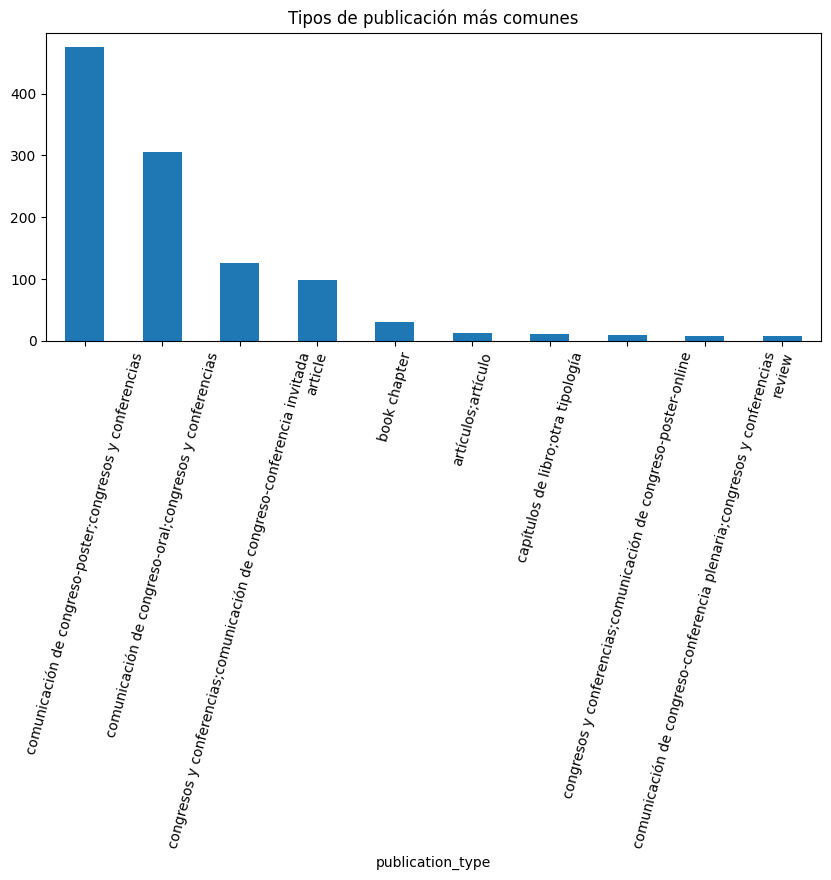


publication_type
comunicaci√≥n de congreso-poster;congresos y conferencias                         475
comunicaci√≥n de congreso-oral;congresos y conferencias                           305
congresos y conferencias;comunicaci√≥n de congreso-conferencia invitada           126
article                                                                           98
book chapter                                                                      31
art√≠culos;art√≠culo                                                                12
cap√≠tulos de libro;otra tipolog√≠a                                                 11
congresos y conferencias;comunicaci√≥n de congreso-poster-online                   10
comunicaci√≥n de congreso-conferencia plenaria;congresos y conferencias             8
review                                                                             8
congresos y conferencias;comunicaci√≥n de congreso-oral-online                      4
editorial                            

In [79]:
plt.figure(figsize=(10, 4))
df['publication_type'].value_counts().head(10).plot(kind='bar')
plt.title("Tipos de publicaci√≥n m√°s comunes")
plt.xticks(rotation=75)
plt.show()

print()
print(df['publication_type'].value_counts())

Tenemos que quitar publication_type... Porque no son nada parecidos entre ambos datasets, el modelo no puede tener en cuenta esto para aprender.

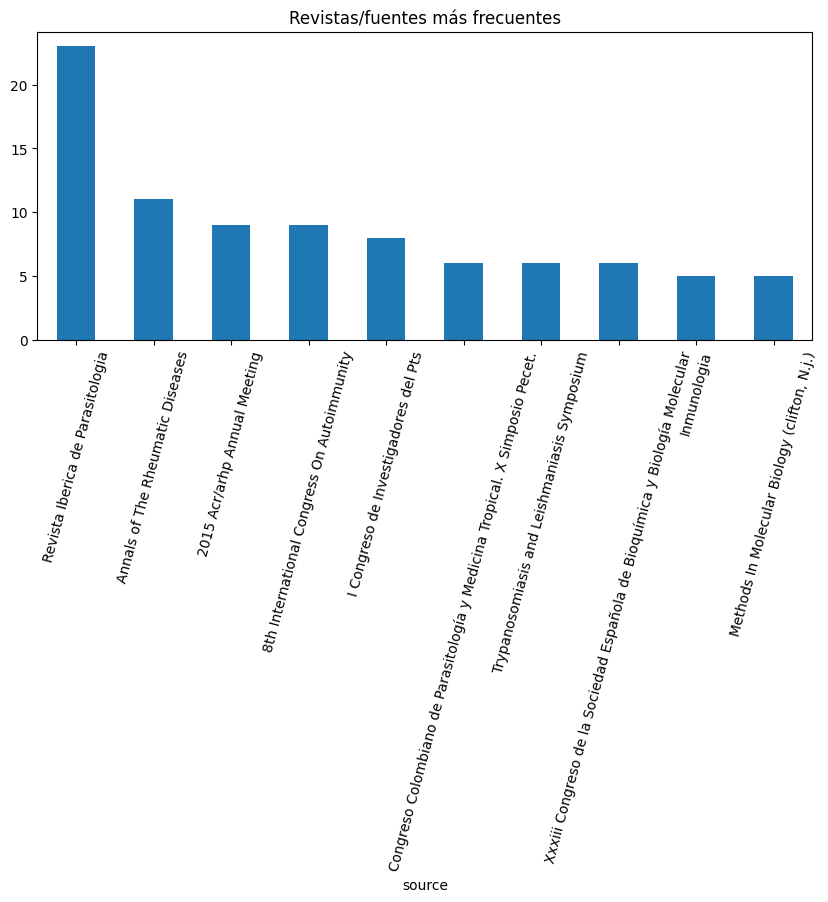


source
Revista Iberica de Parasitologia                                               23
Annals of The Rheumatic Diseases                                               11
2015 Acr/arhp Annual Meeting                                                    9
8th International Congress On Autoimmunity                                      9
I Congreso de Investigadores del Pts                                            8
Congreso Colombiano de Parasitolog√≠a y Medicina Tropical. X Simposio Pecet.     6
Trypanosomiasis and Leishmaniasis Symposium                                     6
Xxxiii Congreso de la Sociedad Espa√±ola de Bioqu√≠mica y Biolog√≠a Molecular      6
Inmunologia                                                                     5
Methods In Molecular Biology (clifton, N.j.)                                    5
Name: count, dtype: int64


In [80]:
plt.figure(figsize=(10, 4))
df['source'].value_counts().head(10).plot(kind='bar')
plt.title("Revistas/fuentes m√°s frecuentes")
plt.xticks(rotation=75)
plt.show()

print()
print(df['source'].value_counts().head(10))